In [3]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from IPython.display import Image
from dotenv import load_dotenv
import os

load_dotenv()
model = ChatOpenAI(model=os.getenv("gpt_model"))

In [4]:
class BlogState(TypedDict):
    title: str
    outline: str
    content: str

In [5]:
def create_outline(state: BlogState) -> BlogState:
    # fetch title
    title = state['title']

    # call llm gen outline
    prompt = f"generate a details outline for a blog on the topic - {title}"
    outline = model.invoke(prompt).content

    # update the answer in the state
    state['outline'] = outline

    return state

In [6]:
def create_blog(state: BlogState) -> BlogState:
    # fetch title
    title = state['title']
    outline = state['outline']

    # call llm gen outline
    prompt = f"write a detailed blog on the title - {title} using the following outline \n {outline}"
    content = model.invoke(prompt).content

    # update the answer in the state
    state['content'] = content

    return state

In [8]:
# create a graph

graph = StateGraph(BlogState)

# add nodes
graph.add_node('create_outline',create_outline)
graph.add_node('create_blog',create_blog)

# add edges
graph.add_edge(START,'create_outline')
graph.add_edge('create_outline','create_blog')
graph.add_edge('create_blog',END)

# comple
workflow = graph.compile()

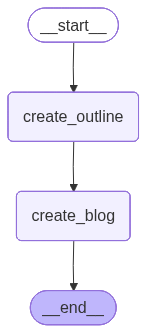

In [9]:
Image(workflow.get_graph().draw_mermaid_png())

In [11]:
# execute

initial_state = {'title':'Fitness level of average population in India'}
reponse_state = workflow.invoke(initial_state)
reponse_state['content']

"# Blog Title: Fitness Level of the Average Population in India: A Comprehensive Overview\n\n## I. Introduction\n\nIn today's fast-paced world, fitness has emerged as a critical component of overall well-being. As lifestyles shift and health issues become more pressing, understanding fitness levels in the average population of India is essential. Fitness is not just about looking good; it plays a crucial role in maintaining mental health, boosting productivity, and improving life quality. Given India's growing population and diverse cultural context, this blog will delve into the current state of fitness within the country, examining trends, barriers, and implications for health.\n\n## II. Understanding Fitness\n\n### A. Definition of Fitness\n\nFitness refers to the ability to perform physical activities efficiently and effectively. It extends beyond mere physical appearance, encompassing endurance, strength, flexibility, and overall health.\n\n### B. Components of Fitness\n\n1. **Car

In [14]:
print(reponse_state['content'])

# Blog Title: Fitness Level of the Average Population in India: A Comprehensive Overview

## I. Introduction

In today's fast-paced world, fitness has emerged as a critical component of overall well-being. As lifestyles shift and health issues become more pressing, understanding fitness levels in the average population of India is essential. Fitness is not just about looking good; it plays a crucial role in maintaining mental health, boosting productivity, and improving life quality. Given India's growing population and diverse cultural context, this blog will delve into the current state of fitness within the country, examining trends, barriers, and implications for health.

## II. Understanding Fitness

### A. Definition of Fitness

Fitness refers to the ability to perform physical activities efficiently and effectively. It extends beyond mere physical appearance, encompassing endurance, strength, flexibility, and overall health.

### B. Components of Fitness

1. **Cardiovascular End